In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: plotly in c:\users\lenovo\appdata\local\programs\python\python312\lib\site-packages (5.19.0)




[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install nbformat>=4.2.0


^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import requests 
import json 
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from kmodes.kprototypes import KPrototypes
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from statsmodels.graphics.mosaicplot import mosaic
from pandas.plotting import parallel_coordinates
import prince
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [5]:
df = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Reputation System\\final\\filecoin_messages_cleaned_jan22jan24_compiled1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656000 entries, 0 to 2655999
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   sender_account      object 
 2   sender_address      object 
 3   sender_type         object 
 4   receiver_account    object 
 5   receiver_address    object 
 6   receiver_type       object 
 7   method_id           int64  
 8   method_name         object 
 9   refundDecimal       float64
 10  refund              float64
 11  amountDecimal       float64
 12  burnedDecimal       float64
 13  overEstimationBurn  float64
 14  baseFeeBurn         float64
 15  success             bool   
 16  minerPenalty        float64
 17  minerTip            float64
 18  exitCode            int64  
dtypes: bool(1), float64(8), int64(2), object(8)
memory usage: 367.3+ MB


In [6]:
df['success'] = df['success'].astype(int)

In [7]:
df.shape

(2656000, 19)

In [8]:
#df_encoded.info()
null_values = df.isnull().sum()

# Display the count of null values for each column
print(null_values)

date                       0
sender_account             0
sender_address             0
sender_type                0
receiver_account        2289
receiver_address           0
receiver_type              0
method_id                  0
method_name           925348
refundDecimal              0
refund                     0
amountDecimal              0
burnedDecimal              0
overEstimationBurn         0
baseFeeBurn                0
success                    0
minerPenalty               0
minerTip                   0
exitCode                   0
dtype: int64


In [9]:
numerical_features = ['refund', 'refundDecimal', 'amountDecimal', 'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'minerPenalty', 'minerTip']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [10]:
df.head()

,date,sender_account,sender_address,sender_type,receiver_account,receiver_address,receiver_type,method_id,method_name,refundDecimal,refund,amountDecimal,burnedDecimal,overEstimationBurn,baseFeeBurn,success,minerPenalty,minerTip,exitCode
0,2022-01-01,f01203758,f1og2qiumoi2ghl6d5iijp5xcfh2q4o7d5xfjjt3y,fil/6/account,f01384070,f1dbpj7pfjhy2okcqonqwgjtr42fo3mt7ncd4rdcq,fil/6/account,0,Transfer,5.153828e-15,5.153831e-15,8.707997e-07,1.909200e-14,1.822014e-15,1.943351e-14,1,0.0,1.526450e-10,0
1,2022-01-01,f033259,f1abjxfbp274xpdqcpuaykwkfb43omjotacm2p3za,fil/6/account,f01657723,f1pvehrjw4zjugo4uszgapnpzmslydyld67t2d6ka,fil/6/account,0,Transfer,1.651061e-13,1.651061e-13,7.272510e-06,1.127853e-13,1.984154e-14,1.128663e-13,1,0.0,1.001534e-09,0
2,2022-01-01,f01497762,f3r37kx5m5o5gevr5j57tgh2rskk5gn7gyec7zso2ydran...,fil/6/account,f084271,f1idgyygmjspqzo2fmuhwkljendzbfnb7jukfxxzi,fil/6/account,0,Transfer,2.229661e-14,2.229661e-14,5.608440e-10,1.985343e-14,3.492619e-15,1.986773e-14,1,0.0,1.401671e-10,0
3,2022-01-01,f0402394,f1roupds4r6vqwpp2ytaoj24om2o5qofem4rtcpki,fil/6/account,f01614774,f1ajhf7lzj5xhmrmy4t5b3hko4eswtbd7g5hkvgcq,fil/6/account,0,Transfer,4.518457e-14,4.518457e-14,5.803177e-07,4.086698e-14,7.189436e-15,4.089633e-14,1,0.0,3.185156e-10,0
4,2022-01-01,f0215684,f1yp4jxrdxvm4fopvtqwvr7zgneobyahqoguuh5tq,fil/6/account,f01383260,f1tddhyobxudj3hs7c2ma7cdxmdh427exqykatmoa,fil/6/account,0,Transfer,2.308428e-15,2.308431e-15,2.245339e-06,1.866819e-14,0.000000e+00,1.938215e-14,1,0.0,1.383176e-10,0


In [11]:
attribute_df = df.loc[:, ['date', 'sender_account', 'sender_address', 'sender_type', 'receiver_account', 'receiver_address', 'receiver_type', 'method_name']]
num_df = df.drop(columns=['date', 'sender_account', 'sender_address', 'sender_type', 'receiver_account', 'receiver_address', 'receiver_type', 'method_name'])


In [ ]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
hopkins(num_df)

In [12]:
num_df.columns

Index(['method_id', 'refundDecimal', 'refund', 'amountDecimal',
       'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'success',
       'minerPenalty', 'minerTip', 'exitCode'],
      dtype='object')

In [13]:
categorical_indices = [num_df.columns.get_loc(col) for col in ['method_id', 'success', 'exitCode']]
categorical_indices

[0, 7, 10]

In [14]:
famd_df=num_df

In [15]:
famd=prince.FAMD(
    n_components=30,
    n_iter=6,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
famd.fit(famd_df)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-1.2150068793498536, -0.0031883636321163884, -0.07580144084207728, -0.08946692025143768, -0.0013016440021886688, -0.08811530643943571, -0.020771998065050406, -0.015309310892394862, -0.01379578903798992, -0.007477375514063291, -0.0007515045150526897, -0.0021255757547442586, -0.0015030090301053794, -0.03621284967974366, -0.8818811825754777, -0.002254513545158069, -0.2826056684771586, -0.1145520676584202, -0.12379996253186658, -0.5991404799869862, -0.173468991361152, -0.1916793255816122, -0.06388672439730235, -0.03309180821720592, -0.16580342457986094, -0.013167422834267363, -0.1862912847426963, -0.02427022197465023, -0.007049737241963199, -0.0035248686209815995, -0.008502303018977034, -0.007129397818400377, -0.034380818237072286, -0.009234642086070867, -0.07444068553318543, -0.06004986632610544, -0.044313284336355604, -0

FAMD(n_components=30, n_iter=6, random_state=42)

In [16]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,3.805,5.25%,5.25%
1,3.100,4.28%,9.52%
2,2.338,3.23%,12.75%
3,1.816,2.51%,15.26%
4,1.682,2.32%,17.58%
5,1.673,2.31%,19.88%
6,1.647,2.27%,22.16%
7,1.618,2.23%,24.39%
8,1.604,2.21%,26.60%


In [17]:
famd=prince.FAMD(
    n_components=12,
    n_iter=6,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
famd.fit(famd_df)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-1.2150068793498536, -0.0031883636321163884, -0.07580144084207728, -0.08946692025143768, -0.0013016440021886688, -0.08811530643943571, -0.020771998065050406, -0.015309310892394862, -0.01379578903798992, -0.007477375514063291, -0.0007515045150526897, -0.0021255757547442586, -0.0015030090301053794, -0.03621284967974366, -0.8818811825754777, -0.002254513545158069, -0.2826056684771586, -0.1145520676584202, -0.12379996253186658, -0.5991404799869862, -0.173468991361152, -0.1916793255816122, -0.06388672439730235, -0.03309180821720592, -0.16580342457986094, -0.013167422834267363, -0.1862912847426963, -0.02427022197465023, -0.007049737241963199, -0.0035248686209815995, -0.008502303018977034, -0.007129397818400377, -0.034380818237072286, -0.009234642086070867, -0.07444068553318543, -0.06004986632610544, -0.044313284336355604, -0

FAMD(n_components=12, n_iter=6, random_state=42)

In [18]:
famd.row_coordinates(famd_df).head(100)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-1.2150068793498536, -0.0031883636321163884, -0.07580144084207728, -0.08946692025143768, -0.0013016440021886688, -0.08811530643943571, -0.020771998065050406, -0.015309310892394862, -0.01379578903798992, -0.007477375514063291, -0.0007515045150526897, -0.0021255757547442586, -0.0015030090301053794, -0.03621284967974366, -0.8818811825754777, -0.002254513545158069, -0.2826056684771586, -0.1145520676584202, -0.12379996253186658, -0.5991404799869862, -0.173468991361152, -0.1916793255816122, -0.06388672439730235, -0.03309180821720592, -0.16580342457986094, -0.013167422834267363, -0.1862912847426963, -0.02427022197465023, -0.007049737241963199, -0.0035248686209815995, -0.008502303018977034, -0.007129397818400377, -0.034380818237072286, -0.009234642086070867, -0.07444068553318543, -0.06004986632610544, -0.044313284336355604, -0

component,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.249056,0.293345,0.042012,0.142955,-0.008893,-0.416916,0.178981,0.216503,-0.376451,0.161587,-0.096746,0.071577
1,-0.249050,0.293296,0.042018,0.143021,-0.008931,-0.417062,0.179056,0.216625,-0.376563,0.161662,-0.096675,0.071619
2,-0.249057,0.293351,0.042012,0.142946,-0.008888,-0.416896,0.178971,0.216487,-0.376436,0.161577,-0.096756,0.071572
3,-0.249056,0.293347,0.042012,0.142952,-0.008892,-0.416909,0.178978,0.216498,-0.376446,0.161583,-0.096750,0.071575
4,-0.249055,0.293334,0.042014,0.142969,-0.008901,-0.416947,0.178998,0.216529,-0.376475,0.161603,-0.096731,0.071586
...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.177629,0.145022,0.002492,-0.545942,0.039923,0.981276,-0.362454,-0.117197,0.418939,0.076562,-0.012337,-0.348186
96,-0.249048,0.293273,0.042021,0.143053,-0.008949,-0.417134,0.179093,0.216685,-0.376619,0.161699,-0.096640,0.071640
97,-0.249057,0.293351,0.042012,0.142946,-0.008888,-0.416896,0.178971,0.216487,-0.376436,0.161577,-0.096756,0.071572
98,-0.249053,0.293321,0.042015,0.142987,-0.008912,-0.416988,0.179018,0.216563,-0.376506,0.161624,-0.096711,0.071598


In [19]:
famd_df_for_cluster=famd.row_coordinates(famd_df)

famd_df_for_cluster.head()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-1.2150068793498536, -0.0031883636321163884, -0.07580144084207728, -0.08946692025143768, -0.0013016440021886688, -0.08811530643943571, -0.020771998065050406, -0.015309310892394862, -0.01379578903798992, -0.007477375514063291, -0.0007515045150526897, -0.0021255757547442586, -0.0015030090301053794, -0.03621284967974366, -0.8818811825754777, -0.002254513545158069, -0.2826056684771586, -0.1145520676584202, -0.12379996253186658, -0.5991404799869862, -0.173468991361152, -0.1916793255816122, -0.06388672439730235, -0.03309180821720592, -0.16580342457986094, -0.013167422834267363, -0.1862912847426963, -0.02427022197465023, -0.007049737241963199, -0.0035248686209815995, -0.008502303018977034, -0.007129397818400377, -0.034380818237072286, -0.009234642086070867, -0.07444068553318543, -0.06004986632610544, -0.044313284336355604, -0

component,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.249056,0.293345,0.042012,0.142955,-0.008893,-0.416916,0.178981,0.216503,-0.376451,0.161587,-0.096746,0.071577
1,-0.249050,0.293296,0.042018,0.143021,-0.008931,-0.417062,0.179056,0.216625,-0.376563,0.161662,-0.096675,0.071619
2,-0.249057,0.293351,0.042012,0.142946,-0.008888,-0.416896,0.178971,0.216487,-0.376436,0.161577,-0.096756,0.071572
3,-0.249056,0.293347,0.042012,0.142952,-0.008892,-0.416909,0.178978,0.216498,-0.376446,0.161583,-0.096750,0.071575
4,-0.249055,0.293334,0.042014,0.142969,-0.008901,-0.416947,0.178998,0.216529,-0.376475,0.161603,-0.096731,0.071586


In [20]:
famd_df_for_cluster = famd_df_for_cluster.rename(columns={0: 'FAMD1', 1: 'FAMD2', 2: 'FAMD3', 3: 'FAMD4', 4: 'FAMD5', 5: 'FAMD6', 6: 'FAMD7', 7: 'FAMD8', 8: 'FAMD9', 9: 'FAMD10', 10: 'FAMD11', 11: 'FAMD12'})


In [21]:
famd_df_for_cluster.head()

component,FAMD1,FAMD2,FAMD3,FAMD4,FAMD5,FAMD6,FAMD7,FAMD8,FAMD9,FAMD10,FAMD11,FAMD12
0,-0.249056,0.293345,0.042012,0.142955,-0.008893,-0.416916,0.178981,0.216503,-0.376451,0.161587,-0.096746,0.071577
1,-0.249050,0.293296,0.042018,0.143021,-0.008931,-0.417062,0.179056,0.216625,-0.376563,0.161662,-0.096675,0.071619
2,-0.249057,0.293351,0.042012,0.142946,-0.008888,-0.416896,0.178971,0.216487,-0.376436,0.161577,-0.096756,0.071572
3,-0.249056,0.293347,0.042012,0.142952,-0.008892,-0.416909,0.178978,0.216498,-0.376446,0.161583,-0.096750,0.071575
4,-0.249055,0.293334,0.042014,0.142969,-0.008901,-0.416947,0.178998,0.216529,-0.376475,0.161603,-0.096731,0.071586


All Clustering Techniques

In [22]:
clustered_num_df=num_df

1. K Means Clustering

In [23]:
model = KMeans(n_clusters = 5,max_iter = 2000)
model.fit(famd_df_for_cluster)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
clustered_num_df['K Means Class'] = labels


In [24]:
unique_values = clustered_num_df['K Means Class'].unique()

print(unique_values)

[1 0 4 2 3]


In [25]:
value_counts = clustered_num_df['K Means Class'].value_counts()

print(value_counts)

K Means Class
1    1664057
0     970769
4      15209
2       3608
3       2357
Name: count, dtype: int64


In [62]:
num_df.columns

Index(['method_id', 'refundDecimal', 'refund', 'amountDecimal',
       'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'success',
       'minerPenalty', 'minerTip', 'exitCode', 'K Means Class',
       'Bisected K Means Class'],
      dtype='object')

In [63]:
num_df.to_csv('C:\\Users\\Lenovo\\Desktop\\Reputation System\\final\\full_kmeans_bisected_clusters.csv')

Visualisations For K Means

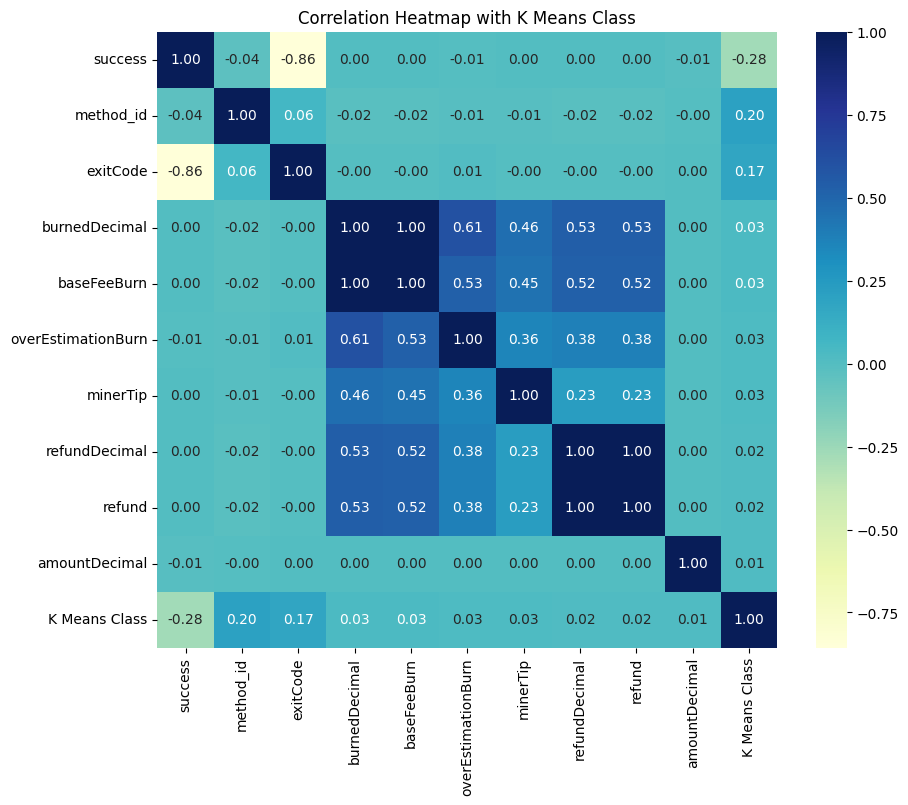

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = num_df.corr()

# Filter only correlations with 'K Means Class'
kmeans_corr = correlation_matrix['K Means Class'].drop('K Means Class')

# Sort correlations in descending order
kmeans_corr_sorted = kmeans_corr.abs().sort_values(ascending=False)

# Select top correlated features
top_features = kmeans_corr_sorted.index[:10]  # Adjust the number of top features as needed

# Extract top correlated features and 'K Means Class'
top_corr_df = num_df[top_features].copy()
top_corr_df['K Means Class'] = num_df['K Means Class']

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_df.corr(), cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Correlation Heatmap with K Means Class')
plt.show()


<Figure size 1000x800 with 0 Axes>

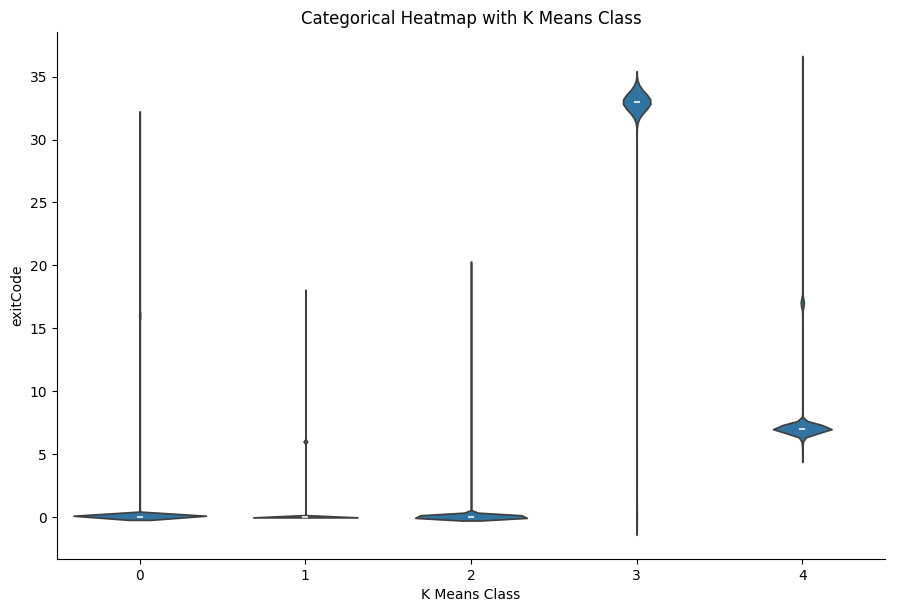

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns including categorical variables
columns_of_interest = ['minerTip', 'success', 'refund', 'exitCode', 'K Means Class', 'method_id']  # Add other categorical columns if needed
cat_df = num_df[columns_of_interest].copy()

# Create categorical heatmap
plt.figure(figsize=(10, 8))
sns.catplot(data=cat_df, x='K Means Class', y='exitCode', kind='violin', height=6, aspect=1.5)
plt.title('Categorical Heatmap with K Means Class')
plt.show()


2. Bisecting K Means

In [29]:
from sklearn.cluster import BisectingKMeans
import pandas as pd


X = famd_df_for_cluster
# Initialize the Bisecting K-Means model
bkm = BisectingKMeans(n_clusters=5)  # You can change the number of clusters as needed

# Fit the model to your data
bkm.fit(X)

# Get cluster labels
cluster_labels = bkm.labels_

# Assign the cluster labels back to your dataframe
clustered_num_df['Bisected K Means Class'] = cluster_labels


In [30]:
unique_values_bisected = clustered_num_df['Bisected K Means Class'].unique()

print(unique_values_bisected)

[4 3 2 1 0]


In [31]:
value_counts_bisected = clustered_num_df['Bisected K Means Class'].value_counts()

print(value_counts_bisected)

Bisected K Means Class
4    2479372
3      99200
2      62209
1      14428
0        791
Name: count, dtype: int64


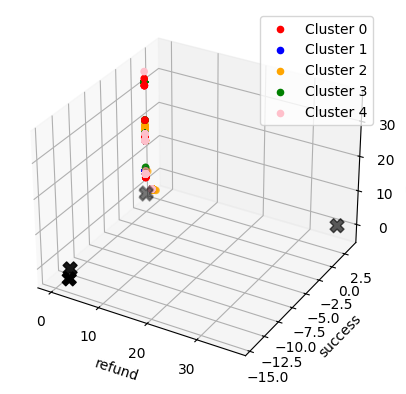

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing Axes3D from mpl_toolkits.mplot3d

# Assuming 'famd_df' contains the data
# Assuming 'centroids' contains the centroid coordinates (you need to define centroids)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Use add_subplot to create a 3D subplot

# Assuming 'x', 'y', 'z' are your variables
x = np.array(famd_df['refund'])
y = np.array(famd_df['success'])
z = np.array(famd_df['exitCode'])

# Assuming 'famd_df' has a column 'Class' indicating the assigned cluster for each data point
cluster_labels = clustered_num_df['Bisected K Means Class']

# Define colors for each cluster
colors = ['r', 'b', 'orange', 'g', 'pink']  # Adjust as needed for 5 clusters

# Plotting data points for each cluster
for cluster_label, color in zip(np.unique(cluster_labels), colors):
    cluster_mask = (cluster_labels == cluster_label)
    ax.scatter(x[cluster_mask], y[cluster_mask], z[cluster_mask], c=color, label=f'Cluster {cluster_label}')

# Plotting centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color='black', s=100)  # Assuming centroids are in 3D space

# Labeling axes
ax.set_xlabel('refund')
ax.set_ylabel('success')
ax.set_zlabel('Exit Code')

# Adding legend
ax.legend()

plt.show()

K Prototypes


In [33]:
categorical_indices

[0, 7, 10]

In [34]:
kproto = KPrototypes(n_clusters=5, init='Cao', n_init=3, verbose=2, random_state=42)

# Fit the model
clusters = kproto.fit_predict(num_df.values, categorical=categorical_indices)

# Assign cluster labels to the DataFrame
num_df['K Prototypes'] = clusters


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids


KeyboardInterrupt: 

In [ ]:
num_df.to_csv('C:\\Users\\Lenovo\\Desktop\\Reputation System\\final\\full_kproto_clusters.csv')

In [ ]:
value_counts = num_df['K Prototypes'].value_counts()

print(value_counts)

No we have identified that Bisected K Means and K Means produce the best results

Next Step: Data Post Processing

Post Processing: K Means

In [35]:
clustered_num_df.columns

Index(['method_id', 'refundDecimal', 'refund', 'amountDecimal',
       'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'success',
       'minerPenalty', 'minerTip', 'exitCode', 'K Means Class',
       'Bisected K Means Class'],
      dtype='object')

In [36]:
import pandas as pd

# Assuming clustered_num_df is your DataFrame

# Select columns for one-hot encoding
columns_to_encode = ['method_id', 'success', 'exitCode']

# Perform one-hot encoding
one_hot_encoded_df = pd.get_dummies(clustered_num_df, columns=columns_to_encode)*1



# Drop specified columns
one_hot_encoded_kmeans = one_hot_encoded_df.drop(columns=['Bisected K Means Class'])

# Now one_hot_encoded_kmeans contains dummy columns for method_id, success, and exitCode with values as 0 or 1



In [37]:
one_hot_encoded_kmeans.head()


,refundDecimal,refund,amountDecimal,burnedDecimal,overEstimationBurn,baseFeeBurn,minerPenalty,minerTip,K Means Class,method_id_0,...,exitCode_17,exitCode_18,exitCode_19,exitCode_20,exitCode_21,exitCode_22,exitCode_32,exitCode_33,exitCode_34,exitCode_36
0,5.153828e-15,5.153831e-15,8.707997e-07,1.909200e-14,1.822014e-15,1.943351e-14,0.0,1.526450e-10,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1.651061e-13,1.651061e-13,7.272510e-06,1.127853e-13,1.984154e-14,1.128663e-13,0.0,1.001534e-09,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2.229661e-14,2.229661e-14,5.608440e-10,1.985343e-14,3.492619e-15,1.986773e-14,0.0,1.401671e-10,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4.518457e-14,4.518457e-14,5.803177e-07,4.086698e-14,7.189436e-15,4.089633e-14,0.0,3.185156e-10,1,1,...,0,0,0,0,0,0,0,0,0,0
4,2.308428e-15,2.308431e-15,2.245339e-06,1.866819e-14,0.000000e+00,1.938215e-14,0.0,1.383176e-10,1,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
one_hot_encoded_kmeans.columns

Index(['refundDecimal', 'refund', 'amountDecimal', 'burnedDecimal',
       'overEstimationBurn', 'baseFeeBurn', 'minerPenalty', 'minerTip',
       'K Means Class', 'method_id_0', 'method_id_1', 'method_id_2',
       'method_id_3', 'method_id_4', 'method_id_5', 'method_id_6',
       'method_id_7', 'method_id_8', 'method_id_9', 'method_id_11',
       'method_id_15', 'method_id_16', 'method_id_18', 'method_id_19',
       'method_id_20', 'method_id_21', 'method_id_22', 'method_id_23',
       'method_id_24', 'method_id_25', 'method_id_26', 'method_id_27',
       'method_id_28', 'method_id_30', 'method_id_32', 'method_id_872461',
       'method_id_3844450837', 'success_0', 'success_1', 'exitCode_0',
       'exitCode_5', 'exitCode_6', 'exitCode_7', 'exitCode_8', 'exitCode_16',
       'exitCode_17', 'exitCode_18', 'exitCode_19', 'exitCode_20',
       'exitCode_21', 'exitCode_22', 'exitCode_32', 'exitCode_33',
       'exitCode_34', 'exitCode_36'],
      dtype='object')

In [39]:
import pandas as pd

# Group by 'sender_account' and calculate count and mean for each group
grouped_df_comb = one_hot_encoded_kmeans.groupby('K Means Class').agg({
    'refundDecimal': 'mean',
    'refund': 'mean',
    'amountDecimal': 'mean',
    'burnedDecimal': 'mean',
    'overEstimationBurn': 'mean',
    'baseFeeBurn': 'mean',
    'success_0': 'mean',
    'success_1': 'mean',
    'minerPenalty': 'mean',
    'minerTip': 'mean',
    'method_id_0': 'mean',
    'method_id_1': 'mean',
    'method_id_2': 'mean',
    'method_id_3': 'mean', 
    'method_id_4': 'mean', 
    'method_id_5': 'mean', 
    'method_id_6': 'mean',
    'method_id_7': 'mean', 
    'method_id_8': 'mean', 
    'method_id_9': 'mean', 
    'method_id_11': 'mean',
    'method_id_15': 'mean', 
    'method_id_16': 'mean', 
    'method_id_18': 'mean', 
    'method_id_19': 'mean',
    'method_id_20': 'mean', 
    'method_id_21': 'mean',
    'method_id_22': 'mean', 
    'method_id_23': 'mean',
    'method_id_24': 'mean', 
    'method_id_25': 'mean', 
    'method_id_26': 'mean', 
    'method_id_27': 'mean',
    'method_id_28': 'mean', 
    'method_id_30': 'mean', 
    'method_id_32': 'mean', 
    'method_id_872461': 'mean',
    'method_id_3844450837': 'mean',
    'exitCode_0': 'mean',
    'exitCode_5': 'mean',
    'exitCode_6': 'mean',
    'exitCode_7': 'mean', 
    'exitCode_8': 'mean', 
    'exitCode_16': 'mean', 
    'exitCode_17': 'mean', 
    'exitCode_18': 'mean',
    'exitCode_19': 'mean', 
    'exitCode_20': 'mean', 
    'exitCode_21': 'mean', 
    'exitCode_22': 'mean',
    'exitCode_32': 'mean', 
    'exitCode_33': 'mean', 
    'exitCode_34': 'mean', 
    'exitCode_36': 'mean'})



# Reset index to make 'sender_account' a regular column
grouped_df_comb.reset_index(inplace=True)



# Display the result
grouped_df_comb.head()


,K Means Class,refundDecimal,refund,amountDecimal,burnedDecimal,overEstimationBurn,baseFeeBurn,success_0,success_1,minerPenalty,...,exitCode_17,exitCode_18,exitCode_19,exitCode_20,exitCode_21,exitCode_22,exitCode_32,exitCode_33,exitCode_34,exitCode_36
0,0,0.000300,0.000300,6.554426e-07,0.000239,0.000067,0.000234,0.015016,0.984984,0.000014,...,0.000000,0.000412,0.000347,0.000101,0.000001,0.000000,0.000004,0.000000,0.000000,0.000000
1,1,0.000032,0.000032,1.893467e-05,0.000059,0.000012,0.000059,0.005970,0.994030,0.000004,...,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,0.048528,0.048528,3.889930e-05,0.048359,0.020636,0.045806,0.003326,0.996674,0.002807,...,0.000000,0.000000,0.000000,0.000277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,0.000002,0.000002,5.003931e-07,0.000018,0.000067,0.000005,0.990666,0.009334,0.000006,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003394,0.000000,0.985151,0.000424,0.000000
4,4,0.000252,0.000252,1.038771e-04,0.000265,0.000004,0.000274,1.000000,0.000000,0.000003,...,0.050233,0.000592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000066


In [40]:
grouped_df_comb.columns

Index(['K Means Class', 'refundDecimal', 'refund', 'amountDecimal',
       'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'success_0',
       'success_1', 'minerPenalty', 'minerTip', 'method_id_0', 'method_id_1',
       'method_id_2', 'method_id_3', 'method_id_4', 'method_id_5',
       'method_id_6', 'method_id_7', 'method_id_8', 'method_id_9',
       'method_id_11', 'method_id_15', 'method_id_16', 'method_id_18',
       'method_id_19', 'method_id_20', 'method_id_21', 'method_id_22',
       'method_id_23', 'method_id_24', 'method_id_25', 'method_id_26',
       'method_id_27', 'method_id_28', 'method_id_30', 'method_id_32',
       'method_id_872461', 'method_id_3844450837', 'exitCode_0', 'exitCode_5',
       'exitCode_6', 'exitCode_7', 'exitCode_8', 'exitCode_16', 'exitCode_17',
       'exitCode_18', 'exitCode_19', 'exitCode_20', 'exitCode_21',
       'exitCode_22', 'exitCode_32', 'exitCode_33', 'exitCode_34',
       'exitCode_36'],
      dtype='object')

In [41]:

# Assuming you already have 'grouped_df_comb' DataFrame
# Initialize an empty DataFrame to store the rankings
mega_df_kmeans = pd.DataFrame()

rank_columns=['refundDecimal', 'amountDecimal',
       'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'success_0',
       'success_1', 'minerPenalty', 'minerTip', 'method_id_0',
       'method_id_2', 'method_id_4', 'method_id_5',
       'method_id_6', 
       'method_id_11', 'method_id_15',
       'method_id_19',  'method_id_21', 'method_id_22',
        'exitCode_0', 'exitCode_5',
       'exitCode_6', 'exitCode_7', 'exitCode_8', 'exitCode_16', 'exitCode_17',
       'exitCode_18', 'exitCode_19', 'exitCode_20', 'exitCode_21',
       'exitCode_22', 'exitCode_32', 'exitCode_33', 'exitCode_34',
       'exitCode_36']

one_hot_encoded_kmeans = grouped_df_comb[rank_columns].copy()

for i in rank_columns:
    # Group by 'K Means Class' and rank each column
    ranked_df = grouped_df_comb[i].rank(method='max', ascending=False)
    # Append the ranked column to mega_df
    mega_df_kmeans[i] = ranked_df

# Now mega_df contains the rankings for each column in columns_to_rank for each cluster
print(mega_df_kmeans)

   refundDecimal  amountDecimal  burnedDecimal  overEstimationBurn  \
0            2.0            4.0            3.0                 2.0   
1            4.0            3.0            4.0                 4.0   
2            1.0            2.0            1.0                 1.0   
3            5.0            5.0            5.0                 3.0   
4            3.0            1.0            2.0                 5.0   

   baseFeeBurn  success_0  success_1  minerPenalty  minerTip  method_id_0  \
0          3.0        3.0        3.0           2.0       2.0          4.0   
1          4.0        4.0        2.0           4.0       5.0          1.0   
2          1.0        5.0        1.0           1.0       1.0          3.0   
3          5.0        2.0        4.0           3.0       4.0          5.0   
4          2.0        1.0        5.0           5.0       3.0          2.0   

   ...  exitCode_17  exitCode_18  exitCode_19  exitCode_20  exitCode_21  \
0  ...          5.0          2.0         

Without Weights / Without Customisation

In [42]:
positive_weight_columns = ['amountDecimal', 'success_1', 'minerTip', 'method_id_0', 'method_id_2', 'method_id_4',
                           'method_id_5', 'method_id_6', 'method_id_19', 'method_id_21', 'exitCode_0']

negative_weight_columns = ['refundDecimal', 'overEstimationBurn', 'success_0', 'minerPenalty', 'method_id_11',
                           'method_id_15', 'method_id_22', 'exitCode_5', 'exitCode_6', 'exitCode_7', 'exitCode_8',
                           'exitCode_16', 'exitCode_17', 'exitCode_18', 'exitCode_19', 'exitCode_20', 'exitCode_21',
                           'exitCode_22', 'exitCode_32', 'exitCode_33', 'exitCode_34', 'exitCode_36']

In [43]:
for col in negative_weight_columns:
    mega_df_kmeans[col] *= -1  # Multiply the column by -1

# Now mega_df contains the rankings for each column
print(mega_df_kmeans)

   refundDecimal  amountDecimal  burnedDecimal  overEstimationBurn  \
0           -2.0            4.0            3.0                -2.0   
1           -4.0            3.0            4.0                -4.0   
2           -1.0            2.0            1.0                -1.0   
3           -5.0            5.0            5.0                -3.0   
4           -3.0            1.0            2.0                -5.0   

   baseFeeBurn  success_0  success_1  minerPenalty  minerTip  method_id_0  \
0          3.0       -3.0        3.0          -2.0       2.0          4.0   
1          4.0       -4.0        2.0          -4.0       5.0          1.0   
2          1.0       -5.0        1.0          -1.0       1.0          3.0   
3          5.0       -2.0        4.0          -3.0       4.0          5.0   
4          2.0       -1.0        5.0          -5.0       3.0          2.0   

   ...  exitCode_17  exitCode_18  exitCode_19  exitCode_20  exitCode_21  \
0  ...         -5.0         -2.0         

In [44]:
# Define the mapping dictionary
value_mapping = {1: 4, 2: 3, 3: 2, 4: 1, 5: 0, -1:-4, -2:-3, -3:-2, -4:-1, -5:0}

# Apply the mapping to the DataFrame
mapped_df = mega_df_kmeans.replace(value_mapping)

# Print the mapped DataFrame
print(mapped_df)


   refundDecimal  amountDecimal  burnedDecimal  overEstimationBurn  \
0           -3.0            1.0            2.0                -3.0   
1           -1.0            2.0            1.0                -1.0   
2           -4.0            3.0            4.0                -4.0   
3            0.0            0.0            0.0                -2.0   
4           -2.0            4.0            3.0                 0.0   

   baseFeeBurn  success_0  success_1  minerPenalty  minerTip  method_id_0  \
0          2.0       -2.0        2.0          -3.0       3.0          1.0   
1          1.0       -1.0        3.0          -1.0       0.0          4.0   
2          4.0        0.0        4.0          -4.0       4.0          2.0   
3          0.0       -3.0        1.0          -2.0       1.0          0.0   
4          3.0       -4.0        0.0           0.0       2.0          3.0   

   ...  exitCode_17  exitCode_18  exitCode_19  exitCode_20  exitCode_21  \
0  ...          0.0         -3.0         

In [45]:
mapped_df['sum'] = mapped_df.sum(axis=1)

# Print the DataFrame with the new 'sum' column
print(mapped_df)

   refundDecimal  amountDecimal  burnedDecimal  overEstimationBurn  \
0           -3.0            1.0            2.0                -3.0   
1           -1.0            2.0            1.0                -1.0   
2           -4.0            3.0            4.0                -4.0   
3            0.0            0.0            0.0                -2.0   
4           -2.0            4.0            3.0                 0.0   

   baseFeeBurn  success_0  success_1  minerPenalty  minerTip  method_id_0  \
0          2.0       -2.0        2.0          -3.0       3.0          1.0   
1          1.0       -1.0        3.0          -1.0       0.0          4.0   
2          4.0        0.0        4.0          -4.0       4.0          2.0   
3          0.0       -3.0        1.0          -2.0       1.0          0.0   
4          3.0       -4.0        0.0           0.0       2.0          3.0   

   ...  exitCode_18  exitCode_19  exitCode_20  exitCode_21  exitCode_22  \
0  ...         -3.0         -4.0         

In [64]:
print(mapped_df['sum'])

0   -17.0
1    15.0
2    10.0
3   -22.0
4    -9.0
Name: sum, dtype: float64


In [46]:
#what if i remove the exit codes
without_exit=mapped_df.drop(columns=['exitCode_5', 'exitCode_6', 'exitCode_7', 'exitCode_8',
                           'exitCode_16', 'exitCode_17', 'exitCode_18', 'exitCode_19', 'exitCode_20', 'exitCode_21',
                           'exitCode_22', 'exitCode_32', 'exitCode_33', 'exitCode_34', 'exitCode_36'])
without_exit['sum'] = without_exit.sum(axis=1)

# Print the DataFrame with the new 'sum' column
print(without_exit)

   refundDecimal  amountDecimal  burnedDecimal  overEstimationBurn  \
0           -3.0            1.0            2.0                -3.0   
1           -1.0            2.0            1.0                -1.0   
2           -4.0            3.0            4.0                -4.0   
3            0.0            0.0            0.0                -2.0   
4           -2.0            4.0            3.0                 0.0   

   baseFeeBurn  success_0  success_1  minerPenalty  minerTip  method_id_0  \
0          2.0       -2.0        2.0          -3.0       3.0          1.0   
1          1.0       -1.0        3.0          -1.0       0.0          4.0   
2          4.0        0.0        4.0          -4.0       4.0          2.0   
3          0.0       -3.0        1.0          -2.0       1.0          0.0   
4          3.0       -4.0        0.0           0.0       2.0          3.0   

   ...  method_id_4  method_id_5  method_id_6  method_id_11  method_id_15  \
0  ...          1.0          4.0       

In [47]:
'''
0->0.75
1>1
2->0.5
3->0.25
4->0
'''

'\n0->0.75\n1>1\n2->0.5\n3->0.25\n4->0\n'

In [48]:
clustered_num_df.columns

Index(['method_id', 'refundDecimal', 'refund', 'amountDecimal',
       'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'success',
       'minerPenalty', 'minerTip', 'exitCode', 'K Means Class',
       'Bisected K Means Class'],
      dtype='object')

In [49]:
k_means_df=clustered_num_df.drop(columns=['Bisected K Means Class'])

In [50]:
k_means_mapping = {
    0: 0.75,
    1: 1,
    2: 0.5,
    3: 0.25,
    4: 0
}

# Map 'K Means Class' column
k_means_df['K Means Class'] = k_means_df['K Means Class'].map(k_means_mapping)

print(k_means_df)

         method_id  refundDecimal        refund  amountDecimal  burnedDecimal  \
0                0   5.153828e-15  5.153831e-15   8.707997e-07   1.909200e-14   
1                0   1.651061e-13  1.651061e-13   7.272510e-06   1.127853e-13   
2                0   2.229661e-14  2.229661e-14   5.608440e-10   1.985343e-14   
3                0   4.518457e-14  4.518457e-14   5.803177e-07   4.086698e-14   
4                0   2.308428e-15  2.308431e-15   2.245339e-06   1.866819e-14   
...            ...            ...           ...            ...            ...   
2655995         32   5.860874e-10  5.860874e-10   0.000000e+00   5.816173e-10   
2655996          0   6.576308e-14  6.576308e-14   2.290429e-09   4.976627e-14   
2655997         28   3.857937e-10  3.857937e-10   2.446795e-07   3.434023e-10   
2655998          0   7.057750e-14  7.057751e-14   2.277544e-09   5.073262e-14   
2655999          5   6.791223e-11  6.791223e-11   0.000000e+00   6.054800e-11   

         overEstimationBurn

In [51]:

final_scores_kmeans = pd.concat([k_means_df, attribute_df], axis=1)

# Reset index after concatenation
final_scores_kmeans.reset_index(drop=True, inplace=True)

# Display the concatenated DataFrame
print(final_scores_kmeans)


         method_id  refundDecimal        refund  amountDecimal  burnedDecimal  \
0                0   5.153828e-15  5.153831e-15   8.707997e-07   1.909200e-14   
1                0   1.651061e-13  1.651061e-13   7.272510e-06   1.127853e-13   
2                0   2.229661e-14  2.229661e-14   5.608440e-10   1.985343e-14   
3                0   4.518457e-14  4.518457e-14   5.803177e-07   4.086698e-14   
4                0   2.308428e-15  2.308431e-15   2.245339e-06   1.866819e-14   
...            ...            ...           ...            ...            ...   
2655995         32   5.860874e-10  5.860874e-10   0.000000e+00   5.816173e-10   
2655996          0   6.576308e-14  6.576308e-14   2.290429e-09   4.976627e-14   
2655997         28   3.857937e-10  3.857937e-10   2.446795e-07   3.434023e-10   
2655998          0   7.057750e-14  7.057751e-14   2.277544e-09   5.073262e-14   
2655999          5   6.791223e-11  6.791223e-11   0.000000e+00   6.054800e-11   

         overEstimationBurn

In [52]:
#To check if mapping is correct
value_counts1 = final_scores_kmeans['K Means Class'].value_counts()

print(value_counts1)

K Means Class
1.00    1664057
0.75     970769
0.00      15209
0.50       3608
0.25       2357
Name: count, dtype: int64


In [53]:
results_kmeans_data_sender=final_scores_kmeans[['date','sender_account','K Means Class']]
grouped_df_sender = results_kmeans_data_sender.groupby('sender_account').agg({
    'date': 'count', 'K Means Class':'mean'})

grouped_df_sender = grouped_df_sender.rename(columns={'date': 'count'})
grouped_df_sender.reset_index(inplace=True)


In [54]:
print(grouped_df_sender)

       sender_account  count  K Means Class
0                 f00    302       0.750000
1            f0100016      1       1.000000
2            f0100023      4       1.000000
3            f0100027    148       0.798986
4            f0100056     64       1.000000
...               ...    ...            ...
318586        f099990      2       1.000000
318587        f099992      1       1.000000
318588        f099993      1       1.000000
318589        f099995      2       1.000000
318590        f099997      1       1.000000

[318591 rows x 3 columns]


In [55]:
grouped_df_sender = grouped_df_sender.rename(columns={'sender_account': 'account'})
grouped_df_sender.reset_index(inplace=True)

In [56]:
results_kmeans_data_receiver=final_scores_kmeans[['date','receiver_account','K Means Class']]
grouped_df_receiver = results_kmeans_data_receiver.groupby('receiver_account').agg({
    'date': 'count', 'K Means Class':'mean'})
grouped_df_receiver= grouped_df_receiver.rename(columns={'date': 'count'})
grouped_df_receiver.reset_index(inplace=True)


In [57]:
grouped_df_receiver = grouped_df_receiver.rename(columns={'receiver_account': 'account'})
grouped_df_receiver.reset_index(inplace=True)

In [58]:
k_means_results_final=pd.concat([grouped_df_sender,grouped_df_receiver],axis=0)
k_means_results_final=k_means_results_final.groupby('account').agg({
    'count': 'sum', 'K Means Class':'mean'})
k_means_results_final.reset_index(inplace=True)

In [73]:
k_means_results_final=k_means_results_final.rename(columns={'K Means Class': 'K Means Reputation Score'})


In [78]:
k_means_results_final[k_means_results_final['count'] > 50].head(50)


,account,count,K Means Reputation Score
0,f00,302,0.750000
1,f01,301,0.748339
2,f010,191,0.973822
7,f0100027,151,0.899493
8,f0100033,169,0.750000
10,f0100056,223,1.000000
11,f0100057,214,0.879808
14,f0100066,219,0.759132
16,f0100082,335,0.750746
21,f010010,111,0.750000


In [59]:
#this is out final reputation score dataframe
k_means_results_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465609 entries, 0 to 465608
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   account        465609 non-null  object 
 1   count          465609 non-null  int64  
 2   K Means Class  465609 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.7+ MB


In [75]:
# Assuming 'df' is your DataFrame
rows_f681832= k_means_results_final[k_means_results_final['account'] == 'f090896']
rows_f01628199= k_means_results_final[k_means_results_final['account'] == 'f01628199']
rows_f01438385= k_means_results_final[k_means_results_final['account'] == 'f01438385']
rows_f0480190= k_means_results_final[k_means_results_final['account'] == 'f0480190']
# Display or use the extracted rows
print(rows_f681832)
print(rows_f01628199)
print(rows_f01438385)
print(rows_f0480190)


        account  count  K Means Reputation Score
464527  f090896     27                  0.768519
          account  count  K Means Reputation Score
105690  f01628199    143                  0.746503
         account  count  K Means Reputation Score
63031  f01438385    170                      0.75
         account  count  K Means Reputation Score
438031  f0480190     45                      0.75


In [77]:
# Assuming 'df' is your DataFrame
rows_f01956427= k_means_results_final[k_means_results_final['account'] == 'f01956427']
rows_f01928087= k_means_results_final[k_means_results_final['account'] == 'f01928087']
rows_f0100174= k_means_results_final[k_means_results_final['account'] == 'f0100174']
rows_f0100126= k_means_results_final[k_means_results_final['account'] == 'f0100126']
# Display or use the extracted rows
print(rows_f01956427)
print(rows_f01928087)
print(rows_f0100174)
print(rows_f0100126)


          account  count  K Means Reputation Score
229021  f01956427    153                       1.0
          account  count  K Means Reputation Score
216039  f01928087     25                       1.0
     account  count  K Means Reputation Score
32  f0100174    129                  0.744186
     account  count  K Means Reputation Score
26  f0100126   3543                       1.0


In [81]:
users=['f0101498','f0101498','f01015802','f01012','f010088','f681832', 'f01628199', 'f01438385', 'f0480190', 'f01956427', 'f01928087', 'f0100174', 'f0100126','f01015701','f0100963']
for user in users: 
    row=k_means_results_final[k_means_results_final['account'] == user]
    print(row)

      account  count  K Means Reputation Score
261  f0101498     57                       1.0
      account  count  K Means Reputation Score
261  f0101498     57                       1.0
       account  count  K Means Reputation Score
319  f01015802     54                       1.0
    account  count  K Means Reputation Score
213  f01012    336                  0.723214
     account  count  K Means Reputation Score
162  f010088    520                  0.807692
Empty DataFrame
Columns: [account, count, K Means Reputation Score]
Index: []
          account  count  K Means Reputation Score
105690  f01628199    143                  0.746503
         account  count  K Means Reputation Score
63031  f01438385    170                      0.75
         account  count  K Means Reputation Score
438031  f0480190     45                      0.75
          account  count  K Means Reputation Score
229021  f01956427    153                       1.0
          account  count  K Means Reputation Score
2

Bisected K Means Clustering 

In [ ]:
one_hot_encoded_bisectedkmeans = one_hot_encoded_df.drop(columns=['K Means Class'])


In [ ]:



# Group by 'sender_account' and calculate count and sum for each group
grouped_df_comb_bisected= one_hot_encoded_bisectedkmeans.groupby('Bisected K Means Class').agg({
    'refundDecimal': 'mean',
    'refund': 'mean',
    'amountDecimal': 'mean',
    'burnedDecimal': 'mean',
    'overEstimationBurn': 'mean',
    'baseFeeBurn': 'mean',
    'success_0': 'mean',
    'success_1': 'mean',
    'minerPenalty': 'mean',
    'minerTip': 'mean',
    'method_id_0': 'mean',
    'method_id_1': 'mean',
    'method_id_2': 'mean',
    'method_id_3': 'mean', 
    'method_id_4': 'mean', 
    'method_id_5': 'mean', 
    'method_id_6': 'mean',
    'method_id_7': 'mean', 
    'method_id_8': 'mean', 
    'method_id_9': 'mean', 
    'method_id_11': 'mean',
    'method_id_15': 'mean', 
    'method_id_16': 'mean', 
    'method_id_18': 'mean', 
    'method_id_19': 'mean',
    'method_id_20': 'mean', 
    'method_id_21': 'mean',
    'method_id_22': 'mean', 
    'method_id_23': 'mean',
    'method_id_24': 'mean', 
    'method_id_25': 'mean', 
    'method_id_26': 'mean', 
    'method_id_27': 'mean',
    'method_id_28': 'mean', 
    'method_id_30': 'mean', 
    'method_id_32': 'mean', 
    'method_id_872461': 'mean',
    'method_id_3844450837': 'mean',
    'exitCode_0': 'mean',
    'exitCode_5': 'mean',
    'exitCode_6': 'mean',
    'exitCode_7': 'mean', 
    'exitCode_8': 'mean', 
    'exitCode_16': 'mean', 
    'exitCode_17': 'mean', 
    'exitCode_18': 'mean',
    'exitCode_19': 'mean', 
    'exitCode_20': 'mean', 
    'exitCode_21': 'mean', 
    'exitCode_22': 'mean',
    'exitCode_32': 'mean', 
    'exitCode_33': 'mean', 
    'exitCode_34': 'mean', 
    'exitCode_36': 'mean'})
   

# Reset index to make 'sender_account' a regular column
grouped_df_comb_bisected.reset_index(inplace=True)

# Display the result

grouped_df_comb_bisected.head()




In [ ]:
one_hot_encoded_bisectedkmeans = grouped_df_comb[rank_columns].copy()
mega_df_bisected_kmeans = pd.DataFrame()

for i in rank_columns:
    # Group by 'K Means Class' and rank each column
    ranked_df = grouped_df_comb[i].rank(method='max', ascending=False)
    # Append the ranked column to mega_df
    mega_df_bisected_kmeans[i] = ranked_df

# Now mega_df contains the rankings for each column in columns_to_rank for each cluster
print(mega_df_bisected_kmeans)

In [ ]:
for col in negative_weight_columns:
    mega_df_bisected_kmeans[col] *= -1  # Multiply the column by -1

# Now mega_df contains the rankings for each column
print(mega_df_bisected_kmeans)

In [ ]:
# Define the mapping dictionary
value_mapping = {1: 4, 2: 3, 3: 2, 4: 1, 5: 0, -1:-4, -2:-3, -3:-2, -4:-1, -5:0}

# Apply the mapping to the DataFrame
mapped_df_bisected_kmeans= mega_df_bisected_kmeans.replace(value_mapping)

mapped_df_bisected_kmeans['sum'] = mapped_df_bisected_kmeans.sum(axis=1)

# Print the DataFrame with the new 'sum' column
print(mapped_df_bisected_kmeans)

In [ ]:
#what if i remove the exit codes
without_exit=mapped_df_bisected_kmeans.drop(columns=['exitCode_5', 'exitCode_6', 'exitCode_7', 'exitCode_8',
                           'exitCode_16', 'exitCode_17', 'exitCode_18', 'exitCode_19', 'exitCode_20', 'exitCode_21',
                           'exitCode_22', 'exitCode_32', 'exitCode_33', 'exitCode_34', 'exitCode_36'])
without_exit['sum'] = without_exit.sum(axis=1)

# Print the DataFrame with the new 'sum' column
print(without_exit)

In [ ]:

bisected_k_means_df=clustered_num_df.drop(columns=['K Means Class'])

In [ ]:
k_means_mapping = {
    0: 0.75,
    1: 1,
    2: 0.25,
    3: 0.5,
    4: 0
}

# Map 'K Means Class' column
bisected_k_means_df['Bisected K Means Class'] = bisected_k_means_df['Bisected K Means Class'].map(k_means_mapping)

print(bisected_k_means_df)

In [ ]:

final_scores_bisectedkmeans = pd.concat([bisected_k_means_df, attribute_df], axis=1)

# Reset index after concatenation
final_scores_bisectedkmeans.reset_index(drop=True, inplace=True)

# Display the concatenated DataFrame
print(final_scores_bisectedkmeans)


In [ ]:
value_counts = final_scores_bisectedkmeans['Bisected K Means Class'].value_counts()

print(value_counts)

In [ ]:
results_bisectedkmeans_data_sender=final_scores_bisectedkmeans[['date','sender_account','Bisected K Means Class']]
grouped_df_sender1 = results_bisectedkmeans_data_sender.groupby('sender_account').agg({
    'date': 'count', 'Bisected K Means Class':'mean'})

grouped_df_sender1 = grouped_df_sender1.rename(columns={'date': 'count'})
grouped_df_sender1.reset_index(inplace=True)


In [ ]:
grouped_df_sender1 = grouped_df_sender1.rename(columns={'sender_account': 'account'})
grouped_df_sender1.reset_index(inplace=True)
print(grouped_df_sender1)

In [ ]:
results_bisectedkmeans_data_receiver=final_scores_bisectedkmeans[['date','receiver_account','Bisected K Means Class']]
grouped_df_receiver1 = results_bisectedkmeans_data_receiver.groupby('receiver_account').agg({
    'date': 'count', 'Bisected K Means Class':'mean'})
grouped_df_receiver1= grouped_df_receiver1.rename(columns={'date': 'count'})
grouped_df_receiver1.reset_index(inplace=True)


In [ ]:
grouped_df_receiver1 = grouped_df_receiver1.rename(columns={'receiver_account': 'account'})
grouped_df_receiver1.reset_index(inplace=True)

In [ ]:
bisected_k_means_results_final=pd.concat([grouped_df_sender1,grouped_df_receiver1],axis=0)
bisected_k_means_results_final=bisected_k_means_results_final.groupby('account').agg({
    'count': 'sum', 'Bisected K Means Class':'mean'})
bisected_k_means_results_final.reset_index(inplace=True)

In [ ]:
# Assuming 'df' is your DataFrame
rows_f681832= bisected_k_means_results_final[bisected_k_means_results_final['account'] == 'f090896']
rows_f01628199= bisected_k_means_results_final[bisected_k_means_results_final['account'] == 'f01628199']
rows_f01438385= bisected_k_means_results_final[bisected_k_means_results_final['account'] == 'f01438385']
rows_f0480190= bisected_k_means_results_final[bisected_k_means_results_final['account'] == 'f0480190']
# Display or use the extracted rows
print(rows_f681832)
print(rows_f01628199)
print(rows_f01438385)
print(rows_f0480190)


In [ ]:
# Assuming 'df' is your DataFrame
rows_f01956427= bisected_k_means_results_final[bisected_k_means_results_final['account'] == 'f01956427']
rows_f01928087= bisected_k_means_results_final[bisected_k_means_results_final['account'] == 'f01928087']

# Display or use the extracted rows
print(rows_f01956427)
print(rows_f01928087)
